Import the necessary libraries and the dataset

In [29]:
df = pd.read_csv('taxi.csv')
df.head(5)

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
0,15,1800000,5800,50,192000
1,15,1790000,6200,50,190400
2,15,1780000,6400,60,191200
3,25,1778000,6500,60,177600
4,25,1750000,6550,60,176800


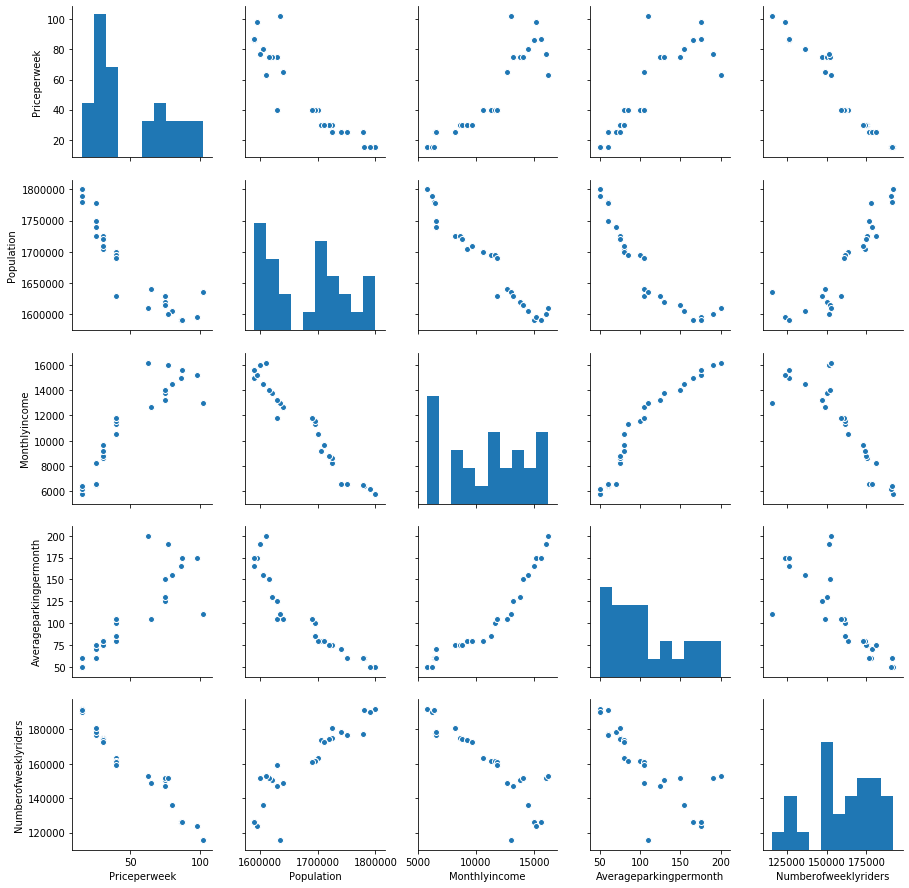

In [30]:
# Plot the Seaborn Pairplot
sns.pairplot(df)

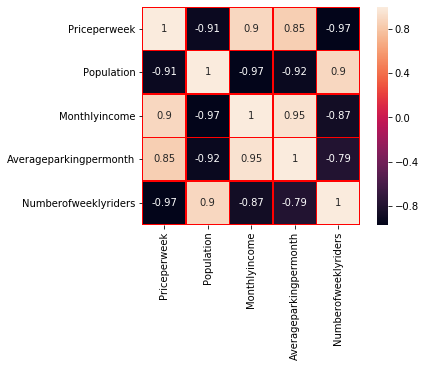

In [31]:
#Plot the Seaborn Heatmap
sns.heatmap(df.corr(),linewidth = 0.2, vmax=1.0, square=True, linecolor='red',annot=True)

In [32]:
#Extract the Features and Labels

features = df.iloc[:,0:-1].values
labels = df.iloc[:,-1].values

In [14]:
features


array([[     15, 1800000,    5800,      50],
       [     15, 1790000,    6200,      50],
       [     15, 1780000,    6400,      60],
       [     25, 1778000,    6500,      60],
       [     25, 1750000,    6550,      60],
       [     25, 1740000,    6580,      70],
       [     25, 1725000,    8200,      75],
       [     30, 1725000,    8600,      75],
       [     30, 1720000,    8800,      75],
       [     30, 1705000,    9200,      80],
       [     30, 1710000,    9630,      80],
       [     40, 1700000,   10570,      80],
       [     40, 1695000,   11330,      85],
       [     40, 1695000,   11600,     100],
       [     40, 1690000,   11800,     105],
       [     40, 1630000,   11830,     105],
       [     65, 1640000,   12650,     105],
       [    102, 1635000,   13000,     110],
       [     75, 1630000,   13224,     125],
       [     75, 1620000,   13766,     130],
       [     75, 1615000,   14010,     150],
       [     80, 1605000,   14468,     155],
       [  

In [16]:
labels

array([192000, 190400, 191200, 177600, 176800, 178400, 180800, 175200,
       174400, 173920, 172800, 163200, 161600, 161600, 160800, 159200,
       148800, 115696, 147200, 150400, 152000, 136000, 126240, 123888,
       126080, 151680, 152800], dtype=int64)

In [33]:
#Cross Validation (train_test_split)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.3,random_state=0)

In [35]:
#Create the Linear Model (LinearRegression)
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#Interpreting the Coefficient and the Intercept
y_pred = regressor.predict(X_test)


In [37]:
#Interpreting the Coefficient and the Intercept

print("Regression Coefficient : ",regressor.coef_)
print("Regression Intercept :", regressor.intercept_)

Regression Coefficient :  [-5.68775893e+02  1.30158909e-01 -5.49376209e-02  1.22759763e+02]
Regression Intercept : -41535.70104644974


In [38]:
#Predict the Score (% Accuracy)

print('Train Score :', regressor.score(X_train,y_train))
print('Test Score:', regressor.score(X_test,y_test))


Train Score : 0.9428364724316814
Test Score: 0.9157379222488224


In [39]:
#Verification of the Predicted Value

#y = b0 + b1*x1 + b2*x2 + b3*x3 + ... + bn*xn

y_output0 = regressor.intercept_ + regressor.coef_[0]*X_test[0][0] + regressor.coef_[1]*X_test[0][1] + regressor.coef_[2]*X_test[0][2] + regressor.coef_[3]*X_test[0][3] 

y_output1 = regressor.intercept_ + regressor.coef_[0]*X_test[1][0] + regressor.coef_[1]*X_test[1][1] + regressor.coef_[2]*X_test[1][2] + regressor.coef_[3]*X_test[1][3] 


In [40]:
#Calculate the MSE and RMSE

from sklearn import metrics

print('MSE :', metrics.mean_squared_error(y_test,y_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MSE : 49715820.672007434
RMSE : 7050.944665220926


In [28]:
X1 = [[80, 1770000, 6000, 85]]
out1 = regressor.predict(X1)